## ONA Support and Data Intern Assignment

1.calculate the number of private and public schoools per district?
2.Calculate the percent of private and public schools per district?
3.Plot a chart of your choice to show the above information in steps 1 and 2

I humbly ask that you check my progress and advice 

### Loading Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

### Loading data & Viewing top 5

In [3]:
df = pd.read_csv("kenya_prim_school_survey-2019-05-20-05-53-08.csv")
df.head()

,name_of_school,school_code,location/province,location/district,location/gps,location/_gps_latitude,location/_gps_longitude,location/_gps_altitude,location/_gps_precision,public_private,...,_submission_time,_tags,_notes,_version,_duration,_submitted_by,_total_media,_media_count,_media_all_received,_xform_id
0,karucho primary,622,central,kirinyaga,-0.504939 37.385198,NaN,NaN,NaN,NaN,public,...,2013-03-04T08:22:55,NaN,NaN,201605172039,NaN,NaN,NaN,NaN,NaN,NaN
1,kahuru primary,800,central,nyeri,-0.458342 37.16117,NaN,NaN,NaN,NaN,public,...,2013-03-04T08:23:27,NaN,NaN,201605172039,NaN,NaN,NaN,NaN,NaN,NaN
2,gatugura primary,673,central,kirinyaga,-0.452951 37.312176,NaN,NaN,NaN,NaN,public,...,2013-03-04T08:23:14,NaN,NaN,201605172039,NaN,NaN,NaN,NaN,NaN,NaN
3,gitumbi sda primary,637,central,kirinyaga,-0.418671 37.394661,NaN,NaN,NaN,NaN,private,...,2013-03-04T08:22:51,NaN,NaN,201605172039,NaN,NaN,NaN,NaN,NaN,NaN
4,rev wajee elite academy primary school,51,central,nyeri,-0.564946 37.079286,NaN,NaN,NaN,NaN,private,...,2013-03-04T08:14:26,NaN,NaN,201605172039,NaN,NaN,NaN,NaN,NaN,NaN


### Summary Table of Location & Type of schools

In [4]:
tab = pd.crosstab(df["location/district"],df["public_private"],margins=True,margins_name="Total")
tab

public_private,private,public,Total
location/district,,,
isiolo,1,0,1
kirinyaga,3,12,15
maragua,3,22,25
nyandarua,1,4,5
nyeri,3,10,13
thika,1,0,1
Total,12,48,60


#### Visualize the Contigency Table above

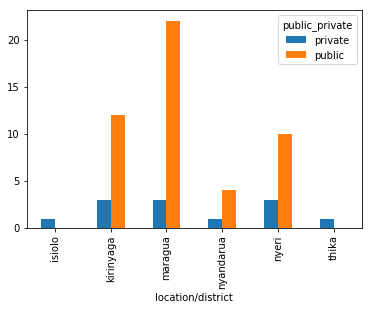

In [5]:
pd.crosstab(df["location/district"],df["public_private"]).plot.bar()

#### 2.Calculate the percent of private and public schools per district?

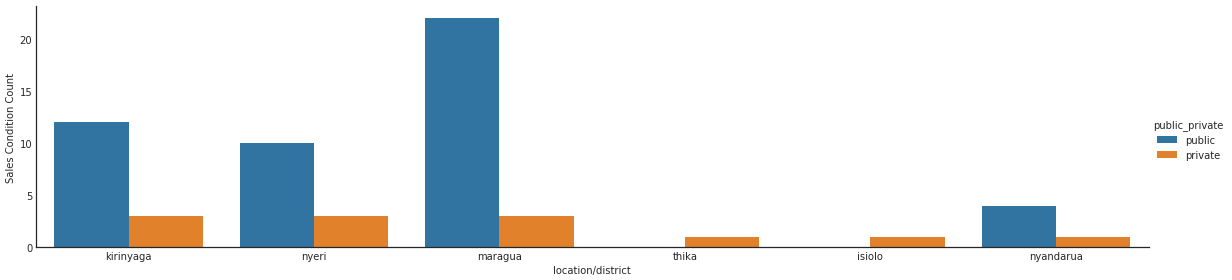

In [18]:
with sns.axes_style('white'):
    g = sns.factorplot("location/district", data=df, aspect=4.0, kind='count',
                       hue='public_private')
    g.set_ylabels('Sales Condition Count')

#### Schools Distribution

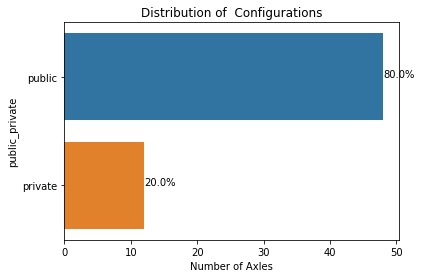

In [11]:

ax = sns.countplot(y="public_private", data=df)
plt.title('Distribution of  Schools')
plt.xlabel('Number of Axles')

total = len(df['public_private'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#### Region Distribution

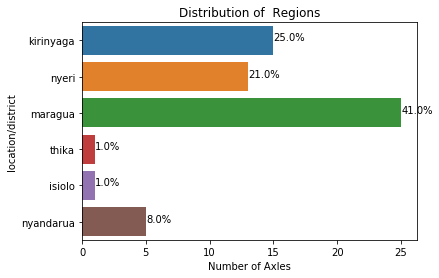

In [28]:
ax = sns.countplot(y="location/district", data=df)
plt.title('Distribution of  Regions')
plt.xlabel('Number of Axles')

total = len(df['location/district'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

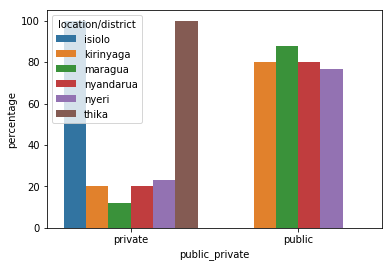

In [24]:
occupation_counts = (df.groupby(['location/district'])['public_private']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('public_private'))
p = sns.barplot(x="public_private", y="percentage", hue="location/district", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=0)

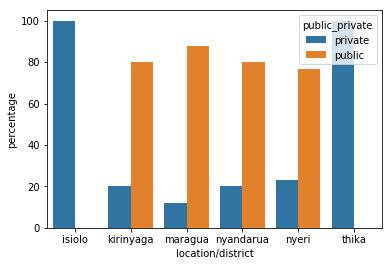

In [30]:
occupation_counts = (df.groupby(['location/district'])['public_private']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('public_private'))
p = sns.barplot(x="location/district", y="percentage", hue="public_private", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels